In [1]:
combinations = [(2, (2,8, 18, 32)),(4,(1,4, 9, 16))]
res_nodes =[]
for comb in combinations:
    res_cpu = []
    for cpu in comb[1]:
        path ='{}_nodes/slurm_nodes_{}_ntasks_{}.out'.format(comb[0],comb[0], cpu)
        with open(path, 'r') as reader:
            # Read and print the entire file line by line
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                if "Wall-clock" in line:
                    line = line.split(": ")[1]
                    # print("{} nodes and {} cpus \t {}".format(comb[0], cpu,line))
                    time = line.split(":")
                    sec = int(time[2]) + int(time[1]) *60 + int(time[0]) *3600
                    res_cpu.append(sec)
                    # print(sec)
                line = reader.readline()
    res_nodes.append(res_cpu)

[ 4 16 36 64]
[ 2  8 18 32]


Text(0, 0.5, 'time in sec')

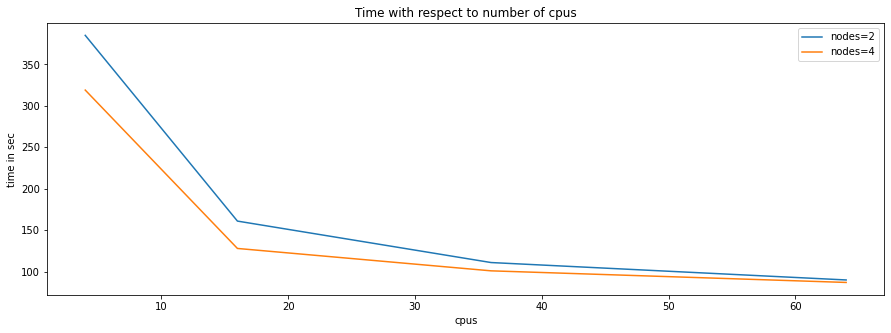

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(15,5))

num_com = 0
node = combinations[num_com][0]
plt.plot(np.array(combinations[num_com][1])*2, res_nodes[num_com], label='nodes=2')
print(np.array(combinations[num_com][1])*2)

num_com = 1
node = combinations[num_com][0]
plt.plot(np.array(combinations[num_com][1])*4, res_nodes[num_com], label='nodes=4')
print(np.array(combinations[num_com][1])*2)
ax.legend()
ax.set_title("Time with respect to number of cpus")
ax.set_xlabel("cpus")
ax.set_ylabel("time in sec")


# with GPU
GV100GL [Tesla V100 SXM2 32GB]

(/scratch/graphDriver/envg) ubuntu@dinh-denbi:/scratch/graphDriver/.test/pylbm/pylbm/torchlbm$ time python lbm_t.py

real    1m35.363s
user    1m33.083s
sys     0m3.088s